This notebook contains code and output of descriptive analyses for the 2000-2017 CC dataset after cleaning

# Setting up the Python environment
Ensure that the following packages have been installed using "pip install <packagename>" from the python command line before running the next chunk:
- pandas
- gsspread
- oauth2client.service_account

**Note: This chunk takes a while to execute.**

In [1]:
import pandas as pd
import numpy as np
import os,glob

import plotly
import plotly.plotly as py
import plotly.graph_objs as go

plotly.tools.set_config_file(world_readable=True)

# increase print limit
pd.options.display.max_rows = 99999
pd.options.display.max_columns = 50

Now we read the data

In [ ]:
# Source Data
sourceDataPers = 'C:/Users/Christopher/Google Drive/TailDemography/outputFiles'
sourceDataBig = 'S:/Chris/TailDemography/data'

#Output Data paths
outputPers = 'C:/Users/Christopher/Google Drive/TailDemography/outputFiles'
outputBig = 'S:/Chris/TailDemography/data'

In [ ]:
os.chdir(sourceDataBig)
mysourcefile = glob.glob('cleaned CC data 2000-2017*')
mysourcefile

In [ ]:
df=pd.read_csv(mysourcefile[0])
df.head()

The following tables exclude non-ideal values for the variables in question, but once the columns are cleaned in the source file, this won't be an issue.

Create boolean flag to drop data from analyses

In [9]:
df['myDrop']= pd.np.nan
df['dropReason']= pd.np.nan

Populate 'myDrop' column bsed on outliers in data

In [10]:
df.loc[((df.svl>75)& (df.species=='v')),'myDrop']=True
df.loc[((df.svl>75)& (df.species=='v')),'dropReason']='svl;species'
df.loc[((df.species=='j')&(df.mass>40)),'myDrop']=True
df.loc[((df.species=='j')&(df.mass>40)),'dropReason']='svl;mass'
df.loc[((df.species=='v')&(df.mass>25)),'myDrop']=True
df.loc[((df.species=='v')&(df.mass>25)),'dropReason']='svl;mass'
df.loc[df.meters< -50,'myDrop']=True
df.loc[df.meters< -50,'dropReason']='meters'
df.myDrop.value_counts()

True    11
Name: myDrop, dtype: int64

Create a dataframe of values based on myDrop==True and export to csv.

In [11]:
df2run=df.loc[df.myDrop!=True]
df2Check=df.loc[df.myDrop==True,]
df2Check

,autotomized,date,location,mass,meters,misc,new.recap,paint.mark,painted,rtl,...,svl,tl,toes,vial,year,tl_svl,mass_svl,age_class,myDrop,dropReason
890,FALSE,2002-07-14T00:00:00Z,halfway up to site,10.0,-200.0,NA,new,b101t,NA,0.0,...,63.0,92.0,3-7-11-19,toes in vial 58-02,2002,1.460317,0.158730,adult,True,meters
891,FALSE,2002-07-14T00:00:00Z,left downstream 100m v 1 falls,10.8,-100.0,NA,new,b102t,NA,0.0,...,66.0,92.0,3-7-11-18,toes in vial 59-02,2002,1.393939,0.163636,adult,True,meters
892,FALSE,2002-07-14T00:00:00Z,90m v 1 falls,10.3,-90.0,NA,new,b103t,NA,0.0,...,68.0,103.0,3-7-12-16,toes in vial 60-02,2002,1.514706,0.151471,adult,True,meters
1723,FALSE,2002-03-20T00:00:00Z,rt slope half way btwn 1&2tripleRs (below R ou...,70.0,320.0,NA,new,y77a,NA,0.0,...,61.0,86.0,4-10-14-20,toes in vial 32-02,2002,1.409836,1.147541,adult,True,svl;mass
6154,FALSE,2012-05-25T00:00:00Z,on oak 6m left side bowl,3.5,NaN,NA,new,w3b,yes,0.0,...,79.0,63.0,7-11-18,12-12,2012,0.797468,0.044304,adult,True,svl;species
6215,TRUE,2013-07-03T00:00:00Z,5m v bottom site,10.0,-55.0,NA,recap,o1c,yes,21.0,...,69.0,53.0,5-11-15,NA,2013,0.768116,0.144928,adult,True,meters
6292,TRUE,2013-07-15T00:00:00Z,left side sb -65,5.6,-65.0,NA,recap,o.a,yes,20.0,...,56.0,54.0,2-6-18,NA,2013,0.964286,0.100000,adult,True,meters
6305,TRUE,2014-07-05T00:00:00Z,in-the-sb--55,14.5,-55.0,TSS;BSS,recap,o29c,yes,30.0,...,74.0,67.0,5-11-16,NA,2014,0.905405,0.195946,adult,True,meters
6306,FALSE,2014-07-07T00:00:00Z,rt sb -55,4.8,-55.0,B rec shed; Tss,new,o32a,yes,0.0,...,52.0,72.0,4-7-11,14-46,2014,1.384615,0.092308,adult,True,meters
7287,FALSE,2016-05-14T00:00:00Z,left Rs opp oakR,28.0,NaN,NA,new,y32b,yes,0.0,...,45.0,57.0,3-6-15-17,16-50,2016,1.266667,0.622222,adult,True,svl;mass


In [12]:
# df2Check.to_csv("Outliers to check(2000-2017).csv")

In [13]:
# df.to_csv("Descriptive Analyses of CC Data (2000-2017).csv")

## Summary Analyses

### Tables

**NOTE:**  We need to format these into laTex tables or something else that has borders.

In [14]:
df.loc[df.myDrop!=True].groupby(['species','sex'])['autotomized'].count()

species  sex
j        f      960
         m      803
v        f      351
         m      430
Name: autotomized, dtype: int64

In [15]:
df.loc[df.myDrop!=True].groupby(['species','sex','autotomized'])['new.recap'].count()

species  sex  autotomized
j        f    FALSE          664
              TRUE           296
         m    FALSE          514
              TRUE           289
v        f    FALSE          286
              TRUE            65
         m    FALSE          334
              TRUE            96
Name: new.recap, dtype: int64

**NOTE:  The plots below need to be edited to better label the axes.**

**NOTE** exclude outliers and rerun (include if mass_svl<0.6)

## Adult lizards

### S. jarrovii
#### SVL

In [16]:
species=['S. jarrovii', 'S. virgatus']
print(species)
sex=['female','male']
print(sex)

['S. jarrovii', 'S. virgatus']
['female', 'male']


<IPython.core.display.Javascript object>


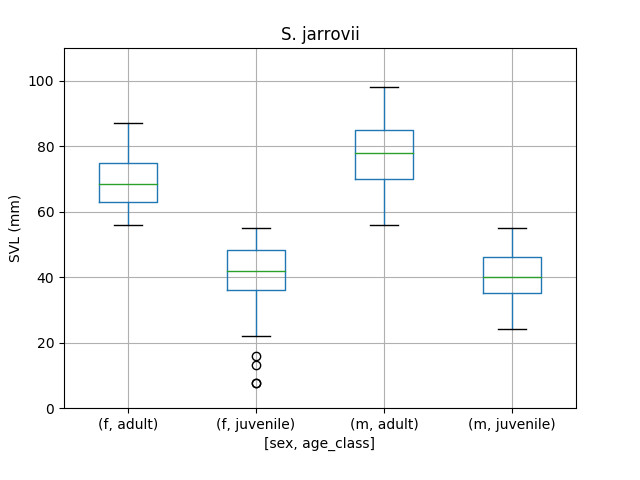

In [27]:
jSvl=df2run.loc[df2run.species=='j'].boxplot(column='svl',by=['sex','age_class'])
jSvl.set_title(species[0])
jSvl.set_ylabel('SVL (mm)')
jSvl.set_ylim(0,110)
plt.suptitle("")

In [18]:
vSvl=df2run.loc[df2run.species=='v'].boxplot(column='svl',by=['sex','age_class'])                                
vSvl.set_title(species[1])
vSvl.set_ylabel('SVL (mm)')
vSvl.set_ylim(0,110)
plt.suptitle("")

<IPython.core.display.Javascript object>

#### TL

There are some hi juveniles values here

In [19]:
jTL=df2run.loc[df2run.species=='j'].boxplot(column=['tl'],by=['sex', 'age_class'])
jTL.set_title(species[0])
jTL.set_ylabel('TL (mm)')
jTL.set_ylim(0,140)
plt.suptitle("")

<IPython.core.display.Javascript object>

In [20]:
vTL=df2run.loc[df2run.species=='v'].boxplot(column=['tl'],by=['sex', 'age_class'])
vTL.set_title(species[1])
vTL.set_ylabel('TL (mm)')
vTL.set_ylim(0,140)
plt.suptitle("")

<IPython.core.display.Javascript object>

#### mass

**NOTE:** There are still some low mass Sj adults that we need to investigate

In [21]:
jMass=df2run.loc[df2run.species=='j'].boxplot(column=['mass'],by=['sex', 'age_class'])
jMass.set_title(species[0])
jMass.set_ylabel('Mass (g)')
jMass.set_ylim(0,35)
plt.suptitle("")

<IPython.core.display.Javascript object>

In [22]:
vMass=df2run.loc[df2run.species=='v'].boxplot(column=['mass'],by=['sex', 'age_class'])
vMass.set_title(species[1])
vMass.set_ylabel('Mass (g)')
vMass.set_ylim(0,35)
plt.suptitle("")

<IPython.core.display.Javascript object>

#### TL/SVL Ratio
**NOTE:** There are still some low SVL/TL ratios here for adults that we need to look into

In [23]:
jTlSvl=df2run.loc[df2run.species=='j'].boxplot(column=['tl_svl'],by=['sex', 'age_class'])
jTlSvl.set_title(species[0])
jTlSvl.set_ylabel('TL/SVL')
jTlSvl.set_ylim(0,2.25)
plt.suptitle("")

<IPython.core.display.Javascript object>

In [24]:
vTlSvl=df2run.loc[df2run.species=='v'].boxplot(column=['tl_svl'],by=['sex', 'age_class'])
vTlSvl.set_title(species[1])
vTlSvl.set_ylabel('TL/SVL')
vTlSvl.set_ylim(0,2.25)
plt.suptitle("")

<IPython.core.display.Javascript object>

In [25]:
jMassSvl=df2run.loc[df2run.species=='j'].boxplot(column=['mass_svl'],by=['sex', 'age_class'])
jMassSvl.set_title(species[0])
jMassSvl.set_ylabel('Mass/SVL (g/mm)')
jMassSvl.set_ylim(0,.8)
plt.suptitle("")

<IPython.core.display.Javascript object>

In [26]:
vMassSvl=df2run.loc[df2run.species=='v'].boxplot(column=['mass_svl'],by=['sex', 'age_class'])
vMassSvl.set_title(species[1])
vMassSvl.set_ylabel('Mass/SVL (g/mm)')
vMassSvl.set_ylim(0,.)
plt.suptitle("")

SyntaxError: invalid syntax (<ipython-input-26-e59d522a0a84>, line 4)

In [ ]:
df.loc[(df.age_class=='adult')&(df.myDrop!=True),].groupby('species').boxplot(column=['mass_svl'],by=['sex'])
df.loc[(df.age_class=='juvenile')&(df.myDrop!=True),].groupby('species').boxplot(column=['mass_svl'],by=['sex'])

Add groupby arguments that include species ageclass and sex for all summaries
    - consider adding year
Types of visualizations:
- tables (autotomy, new/recap (1st sightings only)
- boxplots (svl, tl, rtl, mass)
- histograms (age class (svl), meters (location))

For inferential stats
- differences:
    - between seasons within years 
    - between years (weather and fire)
    - population density (revist how to calculate this)
        - ran study until flatline
        - do we need to account for person-hours still?

The following histograms show the distribution of animals linearly along the site.  The x-axis is location in meters and the y axis in the number of animals.  The graphs are separated by sex and species.

The differences between the adults and juvenile are interesting, no?

Adults

In [ ]:
#Scale the figures so that the y axes are the same
df.loc[(df.myDrop!=True)&(df.age_class=='adult')].groupby('species').hist(column='svl',by=['sex'])

Juveniles

In [ ]:
df.loc[(df.myDrop!=True)&(df.age_class=='juvenile')].groupby('species').hist(column='svl',by=['sex'])

TL - Adults

In [ ]:
#Standardize x and y axes
df.loc[(df.myDrop!=True)&(df.age_class=='adult')].groupby('species').hist(column='tl',by=['sex'])

Juveniles

In [ ]:
df.loc[(df.myDrop!=True)&(df.age_class=='juvenile')].groupby('species').hist(column='tl',by=['sex'])

Overall view of tail loss
**NOTE:** The autotomized==True argumetn is throwing an error here for some reason and rtl!=0 may exclude autotomized individuals which haven't regrown tail. Have to chase this down later

In [ ]:
#df.loc[(df.myDrop!=True)&(df.age_class=='adult')&(df.autotomized==True)].hist(column='rtl',by=['species','sex'])
#df.loc[(df.myDrop!=True)&(df.age_class=='juvenile')&(df.autotomized==True)].hist(column='rtl',by=['species','sex'])
#df.loc[df.rtl!=0].hist(column='rtl',by=['species','sex'])

Adults

In [ ]:
df.loc[((df.age_class=='adult')&(df.myDrop!=True)),].groupby('species').hist(column='tl',by=['sex'])

Juveniles

In [ ]:
df.loc[(df.myDrop!=True)&(df.age_class=='juvenile')].groupby('species').hist(column='svl',by=['sex'])

In [ ]:
df.loc[((df.myDrop!=True)&(df.age_class=='adult')),].groupby('species').hist(column='mass',by=['sex'])